In [6]:
import numpy as np
import matplotlib.pyplot as plt

def cubic_spline_coefficients(x, y):
    n = len(x) - 1  # Anzahl der Intervalle
    h = np.diff(x)  # Abstand zwischen den Stützstellen

    # Schritt 1: System der Gleichungen aufstellen
    A = np.zeros((n+1, n+1))
    b = np.zeros(n+1)

    # Natürliche Spline-Randbedingungen
    A[0, 0] = 1
    A[n, n] = 1

    # Bedingungen für innere Punkte
    for i in range(1, n):
        A[i, i-1] = h[i-1]
        A[i, i] = 2 * (h[i-1] + h[i])
        A[i, i+1] = h[i]
        b[i] = 3 * ((y[i+1] - y[i]) / h[i] - (y[i] - y[i-1]) / h[i-1])

    # Schritt 2: Gleichungssystem lösen
    c = np.linalg.solve(A, b)

    # Schritt 3: Koeffizienten a_i^k berechnen
    a = np.zeros((n, 4))
    for i in range(n):
        a[i, 0] = y[i]
        a[i, 1] = (y[i+1] - y[i]) / h[i] - h[i] * (2*c[i] + c[i+1]) / 3
        a[i, 2] = c[i]
        a[i, 3] = (c[i+1] - c[i]) / (3*h[i])

    return a

# Beispielaufruf:
x = np.array([0, 1, 2, 3])
y = np.array([1, 2, 0, 2])
coefficients = cubic_spline_coefficients(x, y)
print("Koeffizienten der kubischen Splines:")
print(coefficients)


Koeffizienten der kubischen Splines:
[[ 1.          2.06666667  0.         -1.06666667]
 [ 2.         -1.13333333 -3.2         2.33333333]
 [ 0.         -0.53333333  3.8        -1.26666667]]


In [7]:
def evaluate_spline(x, xi, coefficients):
    i = np.searchsorted(xi, x) - 1
    if i == len(xi) - 1:
        i -= 1
    dx = x - xi[i]
    ai = coefficients[i]
    return ai[0] + ai[1] * dx + ai[2] * dx**2 + ai[3] * dx**3

# Beispielaufruf:
x_eval = 1.5
s_eval = evaluate_spline(x_eval, x, coefficients)
print(f"Der Wert des Splines bei x = {x_eval} ist {s_eval}")


Der Wert des Splines bei x = 1.5 ist 0.925


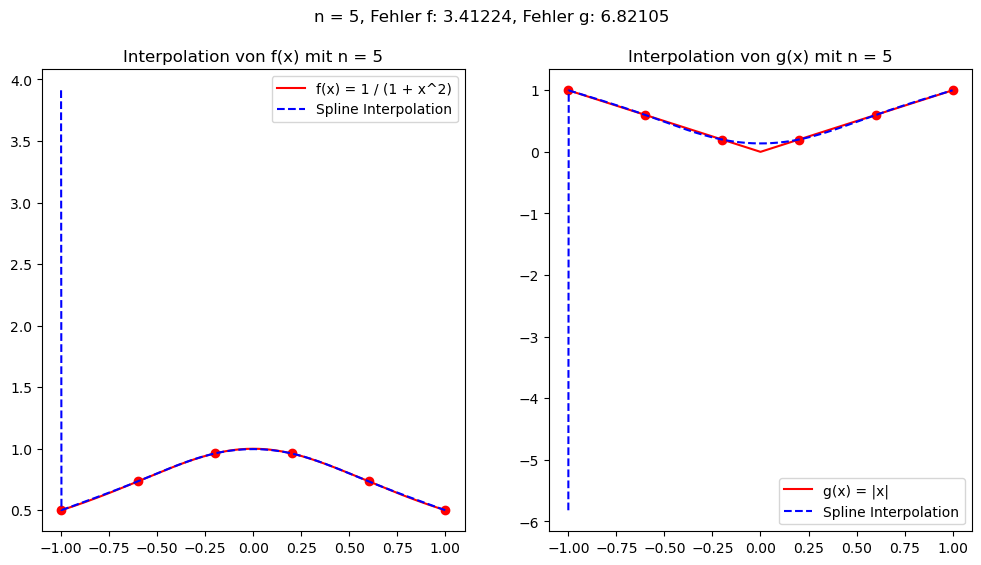

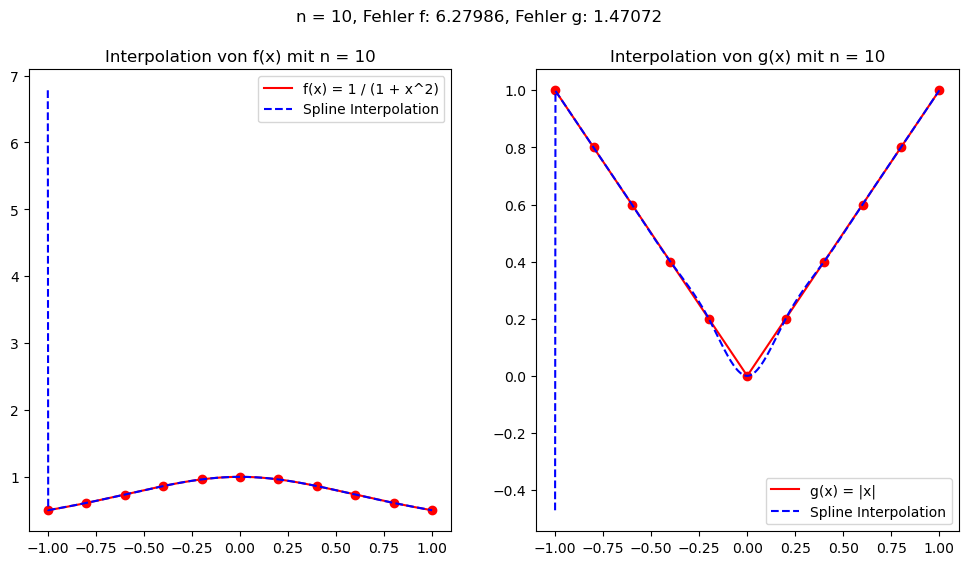

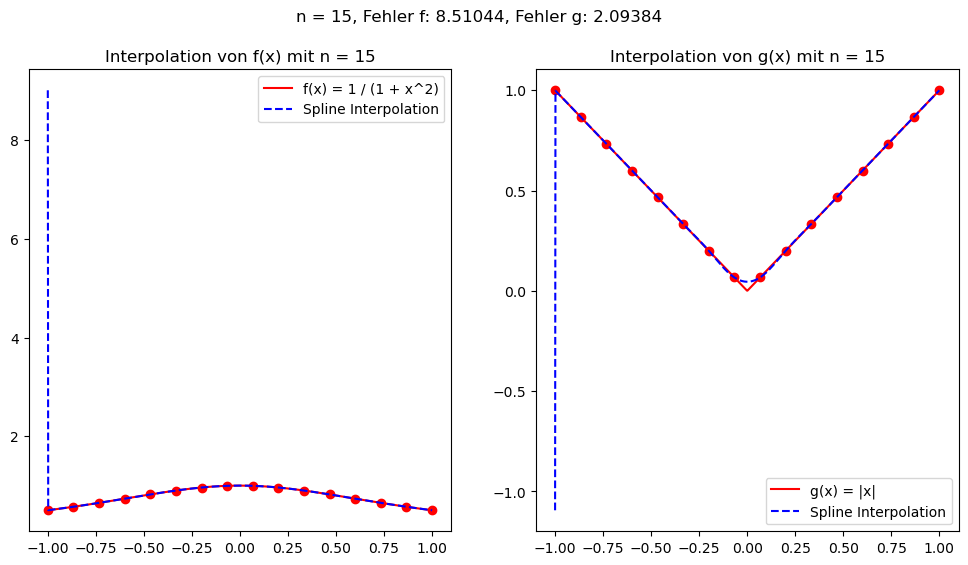

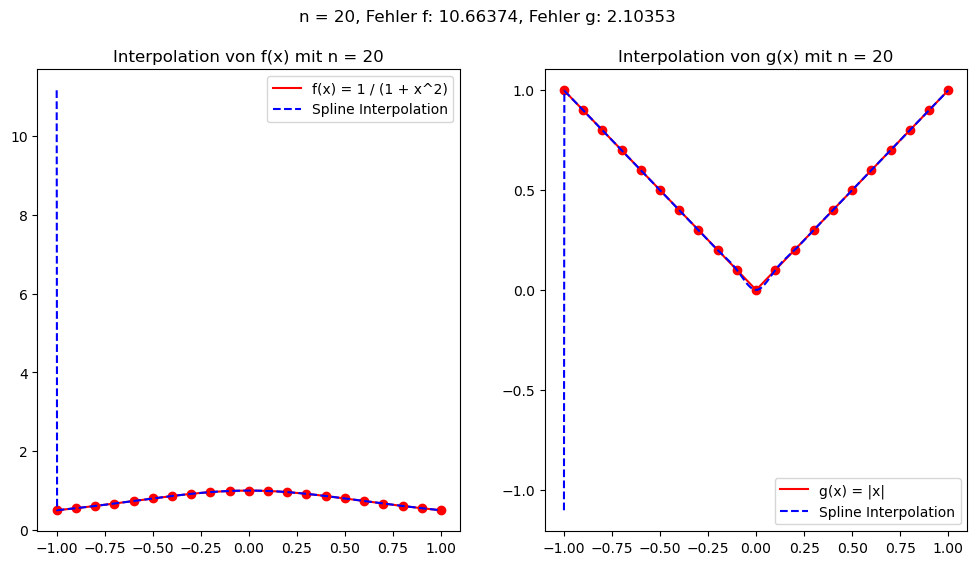

In [8]:
def generate_support_points(a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    return x

# Definition der Funktionen
def f(x):
    return 1 / (1 + x**2)

def g(x):
    return np.abs(x)

# Generiere Stützstellen
a, b = -1, 1
ns = [5, 10, 15, 20]

# Berechne die Splines und die Fehler für jede Funktion und Stützstellen
for n in ns:
    x_support = generate_support_points(a, b, n)
    y_f = f(x_support)
    y_g = g(x_support)
    
    coeff_f = cubic_spline_coefficients(x_support, y_f)
    coeff_g = cubic_spline_coefficients(x_support, y_g)
    
    # Dense grid for evaluation
    x_dense = np.linspace(a, b, 1000)
    f_dense = f(x_dense)
    g_dense = g(x_dense)
    
    # Evaluate the splines on the dense grid
    f_spline_dense = np.array([evaluate_spline(xi, x_support, coeff_f) for xi in x_dense])
    g_spline_dense = np.array([evaluate_spline(xi, x_support, coeff_g) for xi in x_dense])
    
    # Calculate the errors
    error_f = np.max(np.abs(f_dense - f_spline_dense))
    error_g = np.max(np.abs(g_dense - g_spline_dense))
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(x_dense, f_dense, 'r', label='f(x) = 1 / (1 + x^2)')
    plt.plot(x_dense, f_spline_dense, 'b--', label='Spline Interpolation')
    plt.scatter(x_support, y_f, color='red')
    plt.title(f"Interpolation von f(x) mit n = {n}")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(x_dense, g_dense, 'r', label='g(x) = |x|')
    plt.plot(x_dense, g_spline_dense, 'b--', label='Spline Interpolation')
    plt.scatter(x_support, y_g, color='red')
    plt.title(f"Interpolation von g(x) mit n = {n}")
    plt.legend()
    
    plt.suptitle(f"n = {n}, Fehler f: {error_f:.5f}, Fehler g: {error_g:.5f}")
    plt.show()
